In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns


# Set font for Korean display and avoid unicode minus issues
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
base_path = './합본'
years = ['/22', '/23']
regions = ['/수도권', '/동부', '/서부', '/제주산간']
csv_types = ['/TL_csv/', '/VL_csv/']

file_names = ['tn_visit_area_info_방문지정보', 'tn_traveller_master_여행객 Master', 'tn_travel_여행', 'tn_tour_photo_관광사진',
            'tn_mvmn_consume_his_이동수단소비내역', 'tn_move_his_이동내역', 'tn_lodge_consume_his_숙박소비내역', 'tn_companion_info_동반자정보',
             'tn_adv_consume_his_사전소비내역', 'tn_activity_his_활동내역', 'tn_activity_consume_his_활동소비내역' ]

year_region_codes = {
    '/22': ['_A', '_B', '_C', '_D'],  # 22년도 수도권 A, 동부 B, 서부 C, 제주산간 D
    '/23': ['_E', '_F', '_G', '_H']   # 23년도 수도권 E, 동부 F, 서부 G, 제주산간 H
}

m_df =[]
year = '/23'

for file_name in file_names:
    dfs = []
    for region, code in zip(regions, year_region_codes[year]):
        for csv_type in csv_types:
            file_path = f"{base_path}{year}{region}{csv_type}{file_name}{code}.csv"
            df = pd.read_csv(file_path)
            dfs.append(df)
    mdf = pd.concat(dfs)
    m_df.append(mdf)
m_df_dict = {file_name: df for file_name, df in zip(file_names, m_df)} 

In [117]:
lodgings = m_df_dict['tn_lodge_consume_his_숙박소비내역']
lodgings = lodgings[['TRAVEL_ID', 'LODGING_NM', 'LODGING_TYPE_CD']]

In [118]:
travelers = m_df_dict['tn_traveller_master_여행객 Master']
travels = m_df_dict['tn_travel_여행']

In [119]:
travels = travels[['TRAVEL_ID', 'TRAVELER_ID', 'TRAVEL_PURPOSE', 'TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'MVMN_NM']]

In [120]:
travelers = travelers[['TRAVELER_ID', 'GENDER', 'AGE_GRP', 'TRAVEL_STATUS_RESIDENCE', 'TRAVEL_STATUS_DESTINATION', 'TRAVEL_STATUS_ACCOMPANY']]

In [32]:
travels.count()

TRAVEL_ID           11520
TRAVELER_ID         11520
TRAVEL_PURPOSE      11520
TRAVEL_START_YMD    11520
TRAVEL_END_YMD      11520
MVMN_NM             10261
dtype: int64

In [33]:
travelers.count()

TRAVELER_ID                  11520
GENDER                       11520
AGE_GRP                      11520
TRAVEL_STATUS_RESIDENCE      11520
TRAVEL_STATUS_DESTINATION    11520
TRAVEL_STATUS_ACCOMPANY      11520
dtype: int64

In [121]:
merged_traveler = pd.merge(travelers, travels, on='TRAVELER_ID', how='inner')

In [122]:
merged_traveler.count()

TRAVELER_ID                  11520
GENDER                       11520
AGE_GRP                      11520
TRAVEL_STATUS_RESIDENCE      11520
TRAVEL_STATUS_DESTINATION    11520
TRAVEL_STATUS_ACCOMPANY      11520
TRAVEL_ID                    11520
TRAVEL_PURPOSE               11520
TRAVEL_START_YMD             11520
TRAVEL_END_YMD               11520
MVMN_NM                      10261
dtype: int64

In [11]:
merged_traveler['TRAVEL_STATUS_ACCOMPANY'].value_counts()

TRAVEL_STATUS_ACCOMPANY
2인 여행(가족 외)           3990
나홀로 여행                2163
자녀 동반 여행              1902
3인 이상 여행(가족 외)        1424
2인 가족 여행              1293
부모 동반 여행               484
3대 동반 여행(친척 포함)        252
3인 이상 가족 여행(친척 포함)      12
Name: count, dtype: int64

In [37]:
merged_traveler = pd.merge(merged_traveler, lodgings, on='TRAVEL_ID', how='left')

In [40]:
merged_traveler['LODGING_TYPE_CD'].value_counts()

LODGING_TYPE_CD
당일      5932
1.0     2893
3.0     1337
4.0      767
2.0      691
7.0      590
5.0      411
11.0     296
8.0      177
9.0      139
6.0      116
10.0      65
Name: count, dtype: int64

In [39]:
merged_traveler['LODGING_TYPE_CD'].fillna('당일', inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_48136\725077470.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_traveler['LODGING_TYPE_CD'].fillna('당일', inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_48136\725077470.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '당일' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_traveler['LODGING_TYPE_CD'].fillna('당일', inplace=True)


In [3]:
merged_traveler = pd.read_csv('traveler with lodgings.csv')

In [4]:
merged_traveler

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,LODGING_NM,LODGING_TYPE_CD,FAMILY_TRAVEL
0,e004720,여,60,경기도,서울,2인 가족 여행,e_e004720,1;21;22;4;5,2023-07-16,2023-07-17,대중교통 등,NaN,당일치기,가족
1,e000914,여,20,대전광역시,서울,나홀로 여행,e_e000914,1;9,2023-06-03,2023-06-04,대중교통 등,NaN,당일치기,가족 외
2,e003564,여,30,경기도,경기,자녀 동반 여행,e_e003564,11;21;24;27;6,2023-06-24,2023-06-25,자가용,NaN,당일치기,가족
3,e000396,여,30,경기도,인천,2인 가족 여행,e_e000396,23,2023-05-20,2023-05-22,자가용,파라다이스시티,호텔,가족
4,e001890,남,20,서울특별시,경기,2인 여행(가족 외),e_e001890,22;3;4;1;21,2023-06-10,2023-06-11,대중교통 등,NaN,당일치기,가족 외
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13409,f003260,남,30,부산광역시,경남,2인 여행(가족 외),f_f003260,1;2;4,2023-06-28,2023-06-29,자가용,NaN,당일치기,가족 외
13410,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,대중교통 등,로긴리조트&호텔,호텔,가족 외
13411,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,대중교통 등,오케이모텔,모텔 / 여관,가족 외
13412,h001144,남,20,강원도,제주,나홀로 여행,h_h001144,21;23;24;26;4,2023-07-01,2023-07-03,자가용,신신호텔 제주월드컵,호텔,가족 외


In [48]:
merged_traveler.to_csv('traveler with lodgings.csv', index=False)

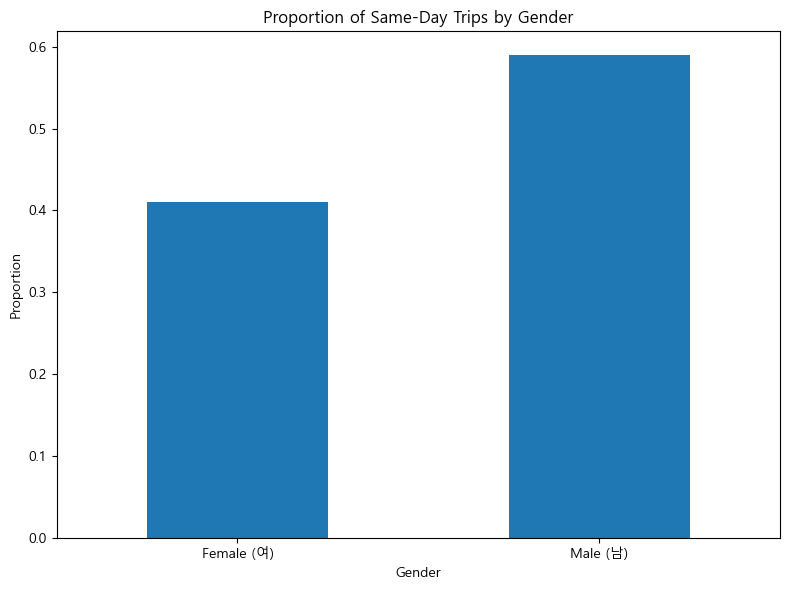

In [11]:
# Filter data for relevant columns
filtered_data = merged_traveler[['GENDER', 'LODGING_TYPE_CD']]

# Count the occurrences of lodging types by gender
gender_lodging_counts = filtered_data[filtered_data['LODGING_TYPE_CD'] == '당일치기'].groupby('GENDER').size()

# Normalize for proportions
gender_proportions = gender_lodging_counts / gender_lodging_counts.sum()

# Plot the proportions
plt.figure(figsize=(8, 6))
gender_proportions.plot(kind='bar', rot=0)
plt.title('Proportion of Same-Day Trips by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['Female (여)', 'Male (남)'], rotation=0)
plt.tight_layout()
plt.show()

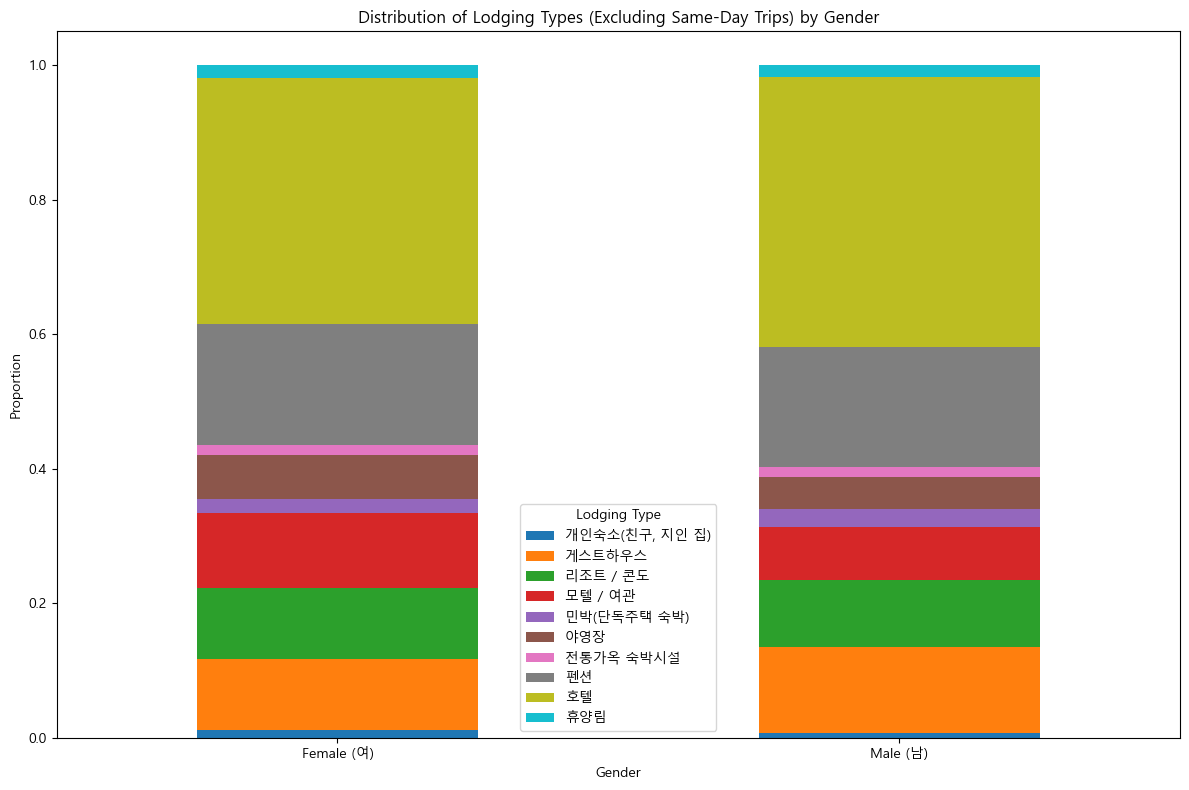

In [12]:
# Filter data excluding '당일' for lodging type
lodging_data = merged_traveler[merged_traveler['LODGING_TYPE_CD'] != '당일치기']

# Count lodging type by gender
lodging_counts_by_gender = lodging_data.groupby(['GENDER', 'LODGING_TYPE_CD']).size().unstack()

# Normalize by gender for proportions
lodging_proportions_by_gender = lodging_counts_by_gender.div(lodging_counts_by_gender.sum(axis=1), axis=0)

# Plot the proportions for each lodging type by gender
lodging_proportions_by_gender.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title('Distribution of Lodging Types (Excluding Same-Day Trips) by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.xticks(ticks=[0, 1], labels=['Female (여)', 'Male (남)'], rotation=0)
plt.legend(title='Lodging Type')
plt.tight_layout()
plt.show()


In [15]:
merged_traveler

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,LODGING_NM,LODGING_TYPE_CD,FAMILY_TRAVEL
0,e004720,여,60,경기도,서울,2인 가족 여행,e_e004720,1;21;22;4;5,2023-07-16,2023-07-17,대중교통 등,NaN,NaN,가족
1,e000914,여,20,대전광역시,서울,나홀로 여행,e_e000914,1;9,2023-06-03,2023-06-04,대중교통 등,NaN,NaN,가족 외
2,e003564,여,30,경기도,경기,자녀 동반 여행,e_e003564,11;21;24;27;6,2023-06-24,2023-06-25,자가용,NaN,NaN,가족
3,e000396,여,30,경기도,인천,2인 가족 여행,e_e000396,23,2023-05-20,2023-05-22,자가용,파라다이스시티,NaN,가족
4,e001890,남,20,서울특별시,경기,2인 여행(가족 외),e_e001890,22;3;4;1;21,2023-06-10,2023-06-11,대중교통 등,NaN,NaN,가족 외
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13409,f003260,남,30,부산광역시,경남,2인 여행(가족 외),f_f003260,1;2;4,2023-06-28,2023-06-29,자가용,NaN,NaN,가족 외
13410,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,대중교통 등,로긴리조트&호텔,NaN,가족 외
13411,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,대중교통 등,오케이모텔,NaN,가족 외
13412,h001144,남,20,강원도,제주,나홀로 여행,h_h001144,21;23;24;26;4,2023-07-01,2023-07-03,자가용,신신호텔 제주월드컵,NaN,가족 외


In [13]:
data = merged_traveler

In [14]:
# Define a mapping for LODGING_TYPE_CD based on the categories provided
lodging_type_mapping = {
    '1.0': '호텔',
    '2.0': '모텔 / 여관',
    '3.0': '펜션',
    '4.0': '리조트 / 콘도',
    '5.0': '야영장',
    '6.0': '전통가옥 숙박시설',
    '7.0': '게스트하우스',
    '8.0': '민박(단독주택 숙박)',
    '9.0': '휴양림',
    '10.0': '개인숙소(친구, 지인 집)',
    '11.0': '게스트하우스',
}

# Map the LODGING_TYPE_CD in the dataset to the new categories
data['LODGING_TYPE_CD'] = data['LODGING_TYPE_CD'].astype(str).map(lodging_type_mapping)

# Display unique values after mapping to ensure correctness
data

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,LODGING_NM,LODGING_TYPE_CD,FAMILY_TRAVEL
0,e004720,여,60,경기도,서울,2인 가족 여행,e_e004720,1;21;22;4;5,2023-07-16,2023-07-17,대중교통 등,NaN,NaN,가족
1,e000914,여,20,대전광역시,서울,나홀로 여행,e_e000914,1;9,2023-06-03,2023-06-04,대중교통 등,NaN,NaN,가족 외
2,e003564,여,30,경기도,경기,자녀 동반 여행,e_e003564,11;21;24;27;6,2023-06-24,2023-06-25,자가용,NaN,NaN,가족
3,e000396,여,30,경기도,인천,2인 가족 여행,e_e000396,23,2023-05-20,2023-05-22,자가용,파라다이스시티,NaN,가족
4,e001890,남,20,서울특별시,경기,2인 여행(가족 외),e_e001890,22;3;4;1;21,2023-06-10,2023-06-11,대중교통 등,NaN,NaN,가족 외
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13409,f003260,남,30,부산광역시,경남,2인 여행(가족 외),f_f003260,1;2;4,2023-06-28,2023-06-29,자가용,NaN,NaN,가족 외
13410,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,대중교통 등,로긴리조트&호텔,NaN,가족 외
13411,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,대중교통 등,오케이모텔,NaN,가족 외
13412,h001144,남,20,강원도,제주,나홀로 여행,h_h001144,21;23;24;26;4,2023-07-01,2023-07-03,자가용,신신호텔 제주월드컵,NaN,가족 외


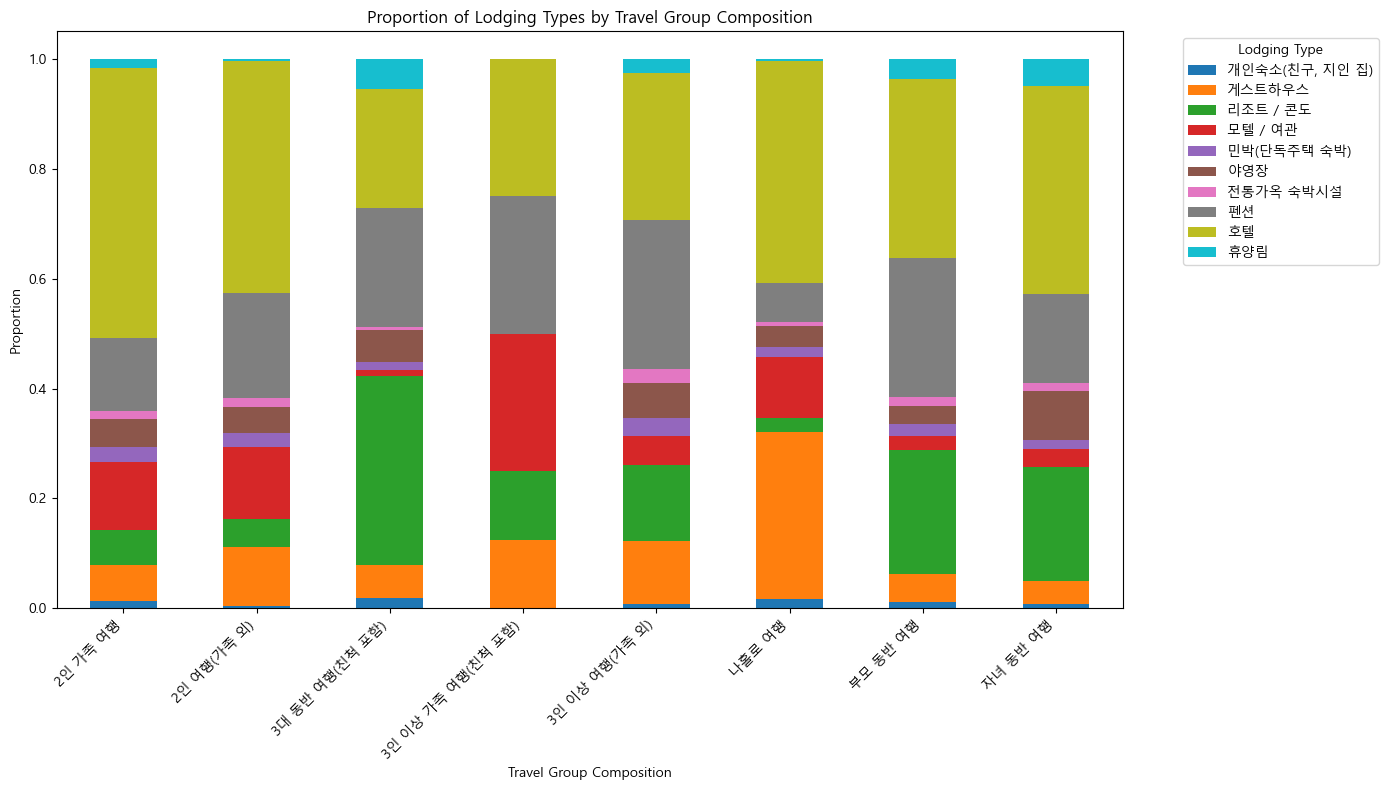

In [75]:
# Cross-tabulate travel group composition with lodging type
group_lodging_crosstab = pd.crosstab(data['TRAVEL_STATUS_ACCOMPANY'], data['LODGING_TYPE_CD'])

# Normalize for proportions within each travel group composition
group_lodging_proportions = group_lodging_crosstab.div(group_lodging_crosstab.sum(axis=1), axis=0)

# Plot the proportions
group_lodging_proportions.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Proportion of Lodging Types by Travel Group Composition')
plt.xlabel('Travel Group Composition')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Lodging Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
accompany_mapping = {
    '2인 여행(가족 외)' : '가족 외',
    '자녀 동반 여행' : '가족',
    '나홀로 여행' : '가족 외',
    '3인 이상 여행(가족 외)' : '가족 외',
    '2인 가족 여행' : '가족',
    '부모 동반 여행' : '가족',
    '3대 동반 여행(친척 포함)' : '가족',
    '3인 이상 가족 여행(친척 포함)' : '가족'
}

#data['FAMILY_TRAVEL'] = data['TRAVEL_STATUS_ACCOMPANY'].map(accompany_mapping)

In [24]:
data[['TRAVEL_STATUS_ACCOMPANY', 'FAMILY_TRAVEL']]

,TRAVEL_STATUS_ACCOMPANY,FAMILY_TRAVEL
3,2인 가족 여행,가족
6,나홀로 여행,가족 외
9,나홀로 여행,가족 외
10,나홀로 여행,가족 외
13,3인 이상 여행(가족 외),가족 외
...,...,...
13408,부모 동반 여행,가족
13410,나홀로 여행,가족 외
13411,나홀로 여행,가족 외
13412,나홀로 여행,가족 외


In [22]:
data = data[data['LODGING_TYPE_CD'] != '당일치기']

In [23]:
data

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,LODGING_NM,LODGING_TYPE_CD,FAMILY_TRAVEL
3,e000396,여,30,경기도,인천,2인 가족 여행,e_e000396,23,2023-05-20,2023-05-22,자가용,파라다이스시티,호텔,가족
6,e003039,여,30,경기도,경기,나홀로 여행,e_e003039,1,2023-06-16,2023-06-18,자가용,늘푸른쉼터 오토캠프장,야영장,가족 외
9,e000655,남,50,서울특별시,경기,나홀로 여행,e_e000655,2;21;22;24;27,2023-05-20,2023-05-23,대중교통 등,A플러스호텔,호텔,가족 외
10,e000655,남,50,서울특별시,경기,나홀로 여행,e_e000655,2;21;22;24;27,2023-05-20,2023-05-23,대중교통 등,에스모텔,호텔,가족 외
13,e002058,남,60,경기도,경기,3인 이상 여행(가족 외),e_e002058,22,2023-06-02,2023-06-04,대중교통 등,곤지암리조트 L빌리지,리조트 / 콘도,가족 외
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13408,h000499,여,30,서울특별시,제주,부모 동반 여행,h_h000499,12;2;21;22;5,2023-06-06,2023-06-09,자가용,야스미스테이,펜션,가족
13410,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,대중교통 등,로긴리조트&호텔,호텔,가족 외
13411,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,대중교통 등,오케이모텔,모텔 / 여관,가족 외
13412,h001144,남,20,강원도,제주,나홀로 여행,h_h001144,21;23;24;26;4,2023-07-01,2023-07-03,자가용,신신호텔 제주월드컵,호텔,가족 외


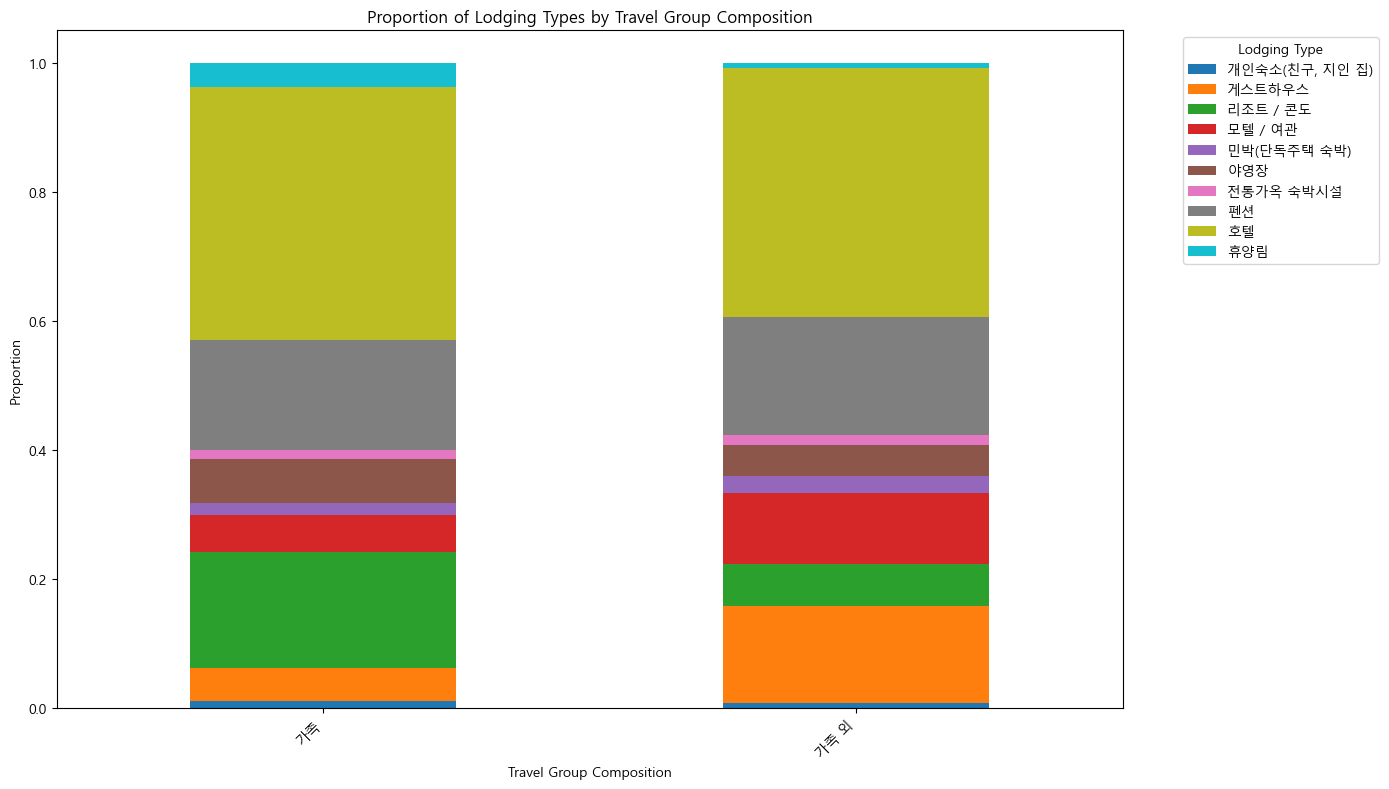

In [25]:
# Cross-tabulate travel group composition with lodging type
group_lodging_crosstab = pd.crosstab(data['FAMILY_TRAVEL'], data['LODGING_TYPE_CD'])

# Normalize for proportions within each travel group composition
group_lodging_proportions = group_lodging_crosstab.div(group_lodging_crosstab.sum(axis=1), axis=0)

# Plot the proportions
group_lodging_proportions.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Proportion of Lodging Types by Travel Group Composition')
plt.xlabel('Travel Group Composition')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Lodging Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


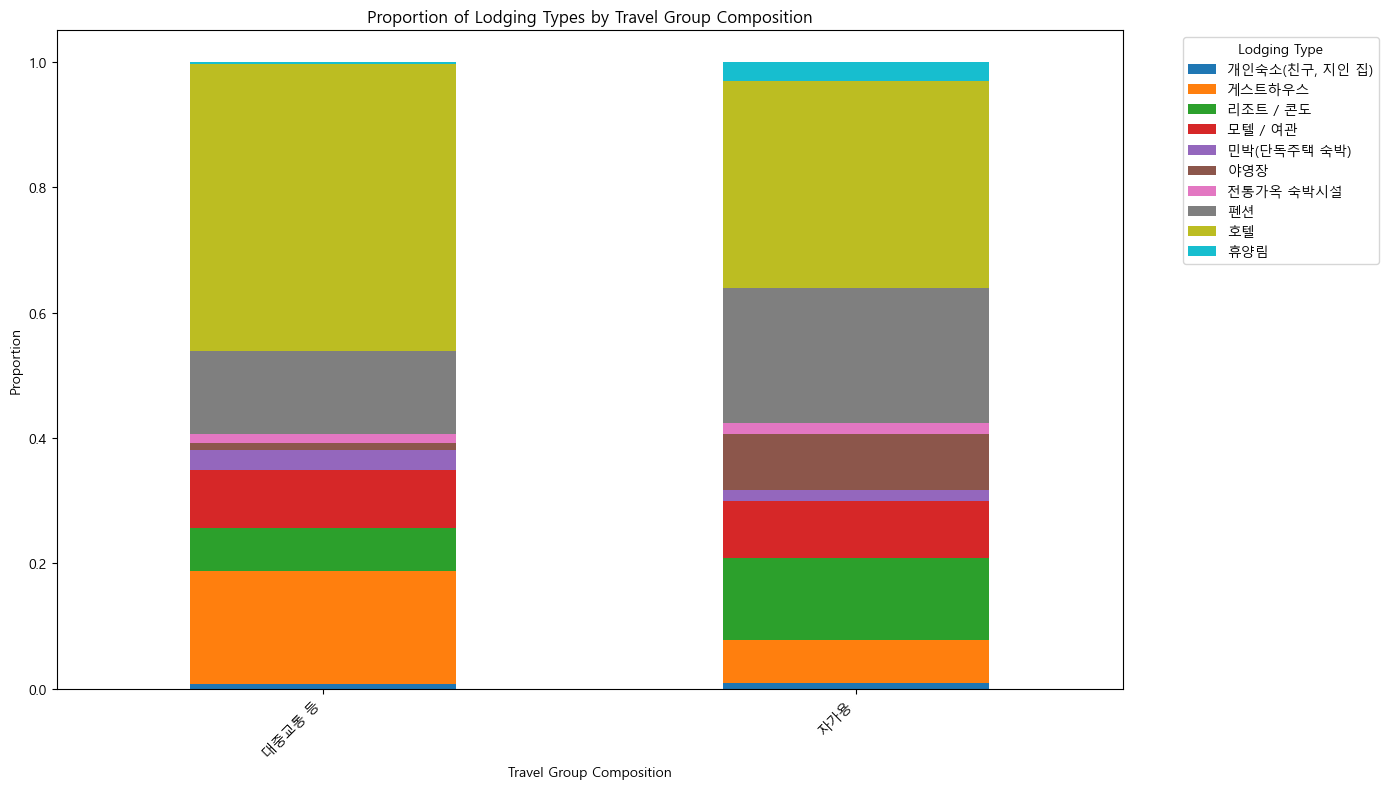

In [26]:
# Cross-tabulate travel group composition with lodging type
group_lodging_crosstab = pd.crosstab(data['MVMN_NM'], data['LODGING_TYPE_CD'])

# Normalize for proportions within each travel group composition
group_lodging_proportions = group_lodging_crosstab.div(group_lodging_crosstab.sum(axis=1), axis=0)

# Plot the proportions
group_lodging_proportions.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Proportion of Lodging Types by Travel Group Composition')
plt.xlabel('Travel Group Composition')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Lodging Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [18]:
# TRAVEL_STATUS_ACCOMPANY 및 MVMN_NM에 따른 LODGING_TYPE_CD의 빈도수 확인
lodging_accompany_mvmn = data[data['LODGING_TYPE_CD'] != '당일치기'].groupby(['FAMILY_TRAVEL', 'MVMN_NM', 'LODGING_TYPE_CD']).size().reset_index(name='count')
lodging_accompany_mvmn

,FAMILY_TRAVEL,MVMN_NM,LODGING_TYPE_CD,count


In [27]:
# Cross-tabulate travel group composition with lodging type
group_lodging_crosstab = pd.crosstab(data['LODGING_TYPE_CD'], data['FAMILY_TRAVEL'])
group_lodging_crosstab

FAMILY_TRAVEL,가족,가족 외
LODGING_TYPE_CD,,
"개인숙소(친구, 지인 집)",26,39
게스트하우스,129,757
리조트 / 콘도,444,323
모텔 / 여관,140,551
민박(단독주택 숙박),49,128
야영장,167,244
전통가옥 숙박시설,35,81
펜션,423,914
호텔,966,1927


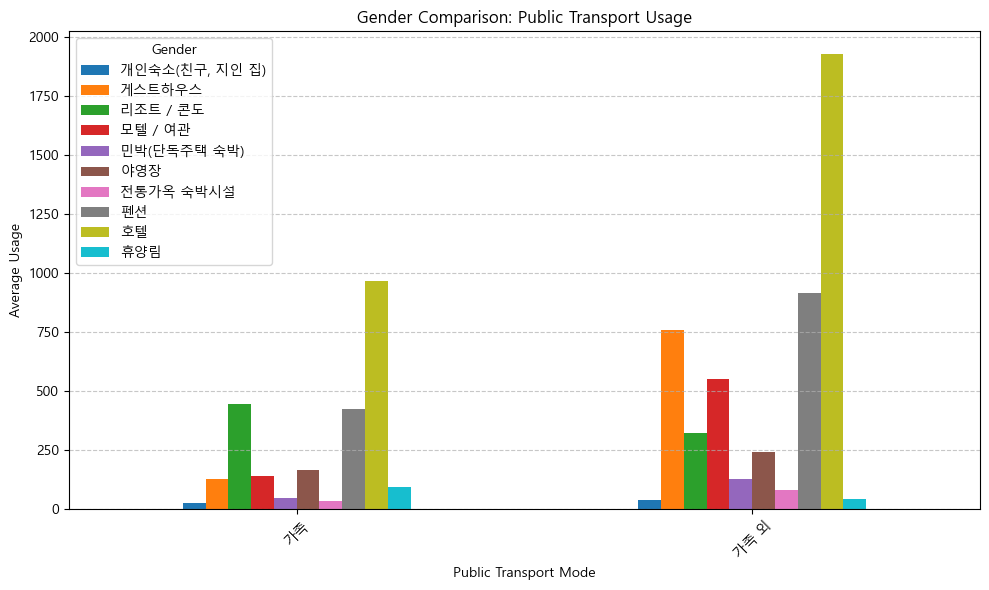

In [ ]:
# 시각화: 성별 대중교통 이용 비교
group_lodging_crosstab.T.plot(kind='bar', figsize=(10, 6), title="Gender Comparison: Public Transport Usage")
plt.xlabel("Public Transport Mode")
plt.ylabel("Average Usage")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


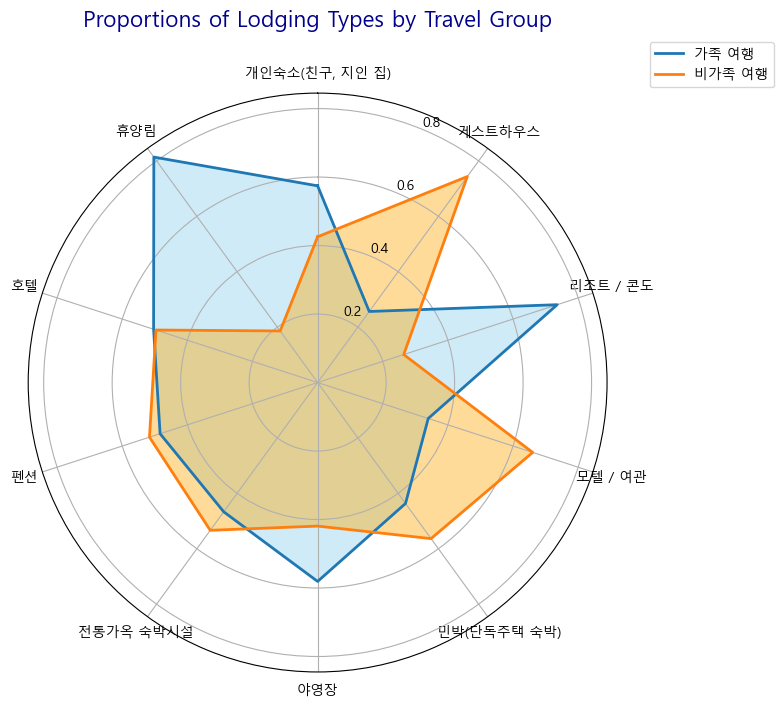

In [225]:
import numpy as np
import matplotlib.pyplot as plt

# Cross-tabulate travel group composition with lodging type
group_lodging_crosstab = pd.crosstab(data['LODGING_TYPE_CD'], data['FAMILY_TRAVEL'])

# Normalize for proportions within each travel group composition
group_lodging_proportions = group_lodging_crosstab.div(group_lodging_crosstab.sum(axis=0), axis=1)
group_lodging_proportions = group_lodging_proportions.div(group_lodging_proportions.sum(axis=1), axis=0)
group_lodging_proportions

# 데이터 준비
lodging_types = [
    "개인숙소(친구, 지인 집)", "게스트하우스", "리조트 / 콘도", 
    "모텔 / 여관", "민박(단독주택 숙박)", "야영장", "전통가옥 숙박시설", 
    "펜션", "호텔", "휴양림"
]
family_proportions = group_lodging_proportions['가족'].tolist()
non_family_proportions = group_lodging_proportions['가족 외'].tolist()
# 레이더 차트를 위한 데이터 준비
num_vars = len(lodging_types)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# 가족 여행과 비가족 여행 비율 추가
family_proportions += family_proportions[:1]
non_family_proportions += non_family_proportions[:1]

# 레이더 차트 그리기
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 시작점 12시 방향으로 설정 및 시계 방향 정렬
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# 가족 여행
ax.plot(angles, family_proportions, linewidth=2, linestyle='solid', label='가족 여행')
ax.fill(angles, family_proportions, color='skyblue', alpha=0.4)

# 비가족 여행
ax.plot(angles, non_family_proportions, linewidth=2, linestyle='solid', label='비가족 여행')
ax.fill(angles, non_family_proportions, color='orange', alpha=0.4)

# 카테고리 라벨 설정
ax.set_xticks(angles[:-1])
ax.set_xticklabels(lodging_types, fontsize=10)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8"], fontsize=10)

# 그래프 제목 및 범례 설정
plt.title('Proportions of Lodging Types by Travel Group', size=16, color='darkblue', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


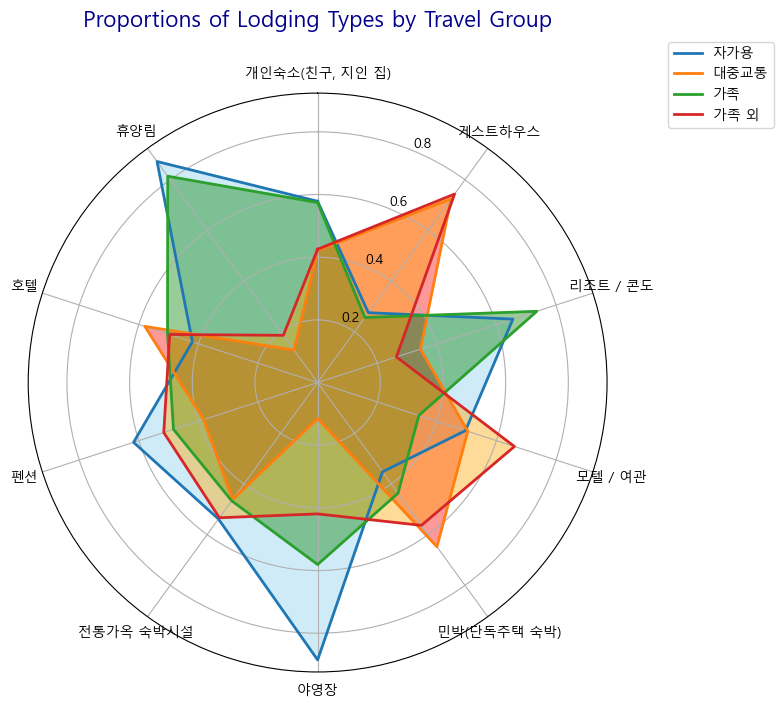

In [176]:
import numpy as np
import matplotlib.pyplot as plt

# Cross-tabulate travel group composition with lodging type
group_lodging_crosstab_mvmn = pd.crosstab(data['LODGING_TYPE_CD'], data['MVMN_NM'])

# Normalize for proportions within each travel group composition
group_lodging_proportions_mvmn = group_lodging_crosstab_mvmn.div(group_lodging_crosstab_mvmn.sum(axis=0), axis=1)
group_lodging_proportions_mvmn = group_lodging_proportions_mvmn.div(group_lodging_proportions_mvmn.sum(axis=1), axis=0)
group_lodging_proportions_mvmn

# Cross-tabulate travel group composition with lodging type
group_lodging_crosstab = pd.crosstab(data['LODGING_TYPE_CD'], data['FAMILY_TRAVEL'])

# Normalize for proportions within each travel group composition
group_lodging_proportions = group_lodging_crosstab.div(group_lodging_crosstab.sum(axis=0), axis=1)
group_lodging_proportions = group_lodging_proportions.div(group_lodging_proportions.sum(axis=1), axis=0)
group_lodging_proportions

# 데이터 준비
lodging_types = [
    "개인숙소(친구, 지인 집)", "게스트하우스", "리조트 / 콘도", 
    "모텔 / 여관", "민박(단독주택 숙박)", "야영장", "전통가옥 숙박시설", 
    "펜션", "호텔", "휴양림"
]
private_proportions = group_lodging_proportions_mvmn['자가용'].tolist()
public_proportions = group_lodging_proportions_mvmn['대중교통 등'].tolist()
family_proportions = group_lodging_proportions['가족'].tolist()
non_family_proportions = group_lodging_proportions['가족 외'].tolist()

# 레이더 차트를 위한 데이터 준비
num_vars = len(lodging_types)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# 가족 여행과 비가족 여행 비율 추가
family_proportions += family_proportions[:1]
non_family_proportions += non_family_proportions[:1]
private_proportions += private_proportions[:1]
public_proportions += public_proportions[:1]

# 레이더 차트 그리기
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 시작점 12시 방향으로 설정 및 시계 방향 정렬
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# 자가용 여행
ax.plot(angles, private_proportions, linewidth=2, linestyle='solid', label='자가용')
ax.fill(angles, private_proportions, color='skyblue', alpha=0.4)

# 대중교통 여행
ax.plot(angles, public_proportions, linewidth=2, linestyle='solid', label='대중교통')
ax.fill(angles, public_proportions, color='red', alpha=0.4)

# 가족 여행
ax.plot(angles, family_proportions, linewidth=2, linestyle='solid', label='가족')
ax.fill(angles, family_proportions, color='green', alpha=0.4)

# 비가족 여행
ax.plot(angles, non_family_proportions, linewidth=2, linestyle='solid', label='가족 외')
ax.fill(angles, non_family_proportions, color='orange', alpha=0.4)
 

# 카테고리 라벨 설정
ax.set_xticks(angles[:-1])
ax.set_xticklabels(lodging_types, fontsize=10)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8"], fontsize=10)

# 그래프 제목 및 범례 설정
plt.title('Proportions of Lodging Types by Travel Group', size=16, color='darkblue', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


In [ ]:
# Cross-tabulate travel group composition with lodging type
group_lodging_crosstab = pd.crosstab(data['LODGING_TYPE_CD'], data['FAMILY_TRAVEL'])

# Normalize for proportions within each travel group composition
group_lodging_proportions = group_lodging_crosstab.div(group_lodging_crosstab.sum(axis=0), axis=1)
group_lodging_proportions = group_lodging_proportions.div(group_lodging_proportions.sum(axis=1), axis=0)
group_lodging_proportions

# Cross-tabulate travel group composition with lodging type
group_lodging_crosstab_mvmn = pd.crosstab(data['LODGING_TYPE_CD'], data['MVMN_NM'])

# Normalize for proportions within each travel group composition
group_lodging_proportions_mvmn = group_lodging_crosstab_mvmn.div(group_lodging_crosstab_mvmn.sum(axis=0), axis=1)
group_lodging_proportions_mvmn = group_lodging_proportions_mvmn.div(group_lodging_proportions_mvmn.sum(axis=1), axis=0)
group_lodging_proportions_mvmn

# 데이터 준비
lodging_types = [
    "개인숙소(친구, 지인 집)", "게스트하우스", "리조트 / 콘도", 
    "모텔 / 여관", "민박(단독주택 숙박)", "야영장", "전통가옥 숙박시설", 
    "펜션", "호텔", "휴양림"
]
family_proportions = group_lodging_proportions_mvmn['자가용'].tolist()
non_family_proportions = group_lodging_proportions_mvmn['대중교통 등'].tolist()
# 레이더 차트를 위한 데이터 준비
num_vars = len(lodging_types)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# 가족 여행과 비가족 여행 비율 추가
family_proportions += family_proportions[:1]
non_family_proportions += non_family_proportions[:1]

# 레이더 차트 그리기
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 시작점 12시 방향으로 설정 및 시계 방향 정렬
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# 가족 여행
ax.plot(angles, family_proportions, linewidth=2, linestyle='solid', label='자가용')
ax.fill(angles, family_proportions, color='skyblue', alpha=0.4)

# 비가족 여행
ax.plot(angles, non_family_proportions, linewidth=2, linestyle='solid', label='대중교통')
ax.fill(angles, non_family_proportions, color='orange', alpha=0.4)

# 카테고리 라벨 설정
ax.set_xticks(angles[:-1])
ax.set_xticklabels(lodging_types, fontsize=10)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8"], fontsize=10)

# 그래프 제목 및 범례 설정
plt.title('Proportions of Lodging Types by Travel Group', size=16, color='darkblue', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


In [232]:
group_lodging_crosstab# Cross-tabulate travel group composition with lodging type
group_lodging_crosstab = pd.crosstab(data['LODGING_TYPE_CD'], data['MVMN_NM'])
group_lodging_crosstab

MVMN_NM,대중교통 등,자가용
LODGING_TYPE_CD,,
"개인숙소(친구, 지인 집)",24,40
게스트하우스,604,279
리조트 / 콘도,231,533
모텔 / 여관,311,372
민박(단독주택 숙박),106,70
야영장,39,365
전통가옥 숙박시설,48,68
펜션,447,877
호텔,1530,1347


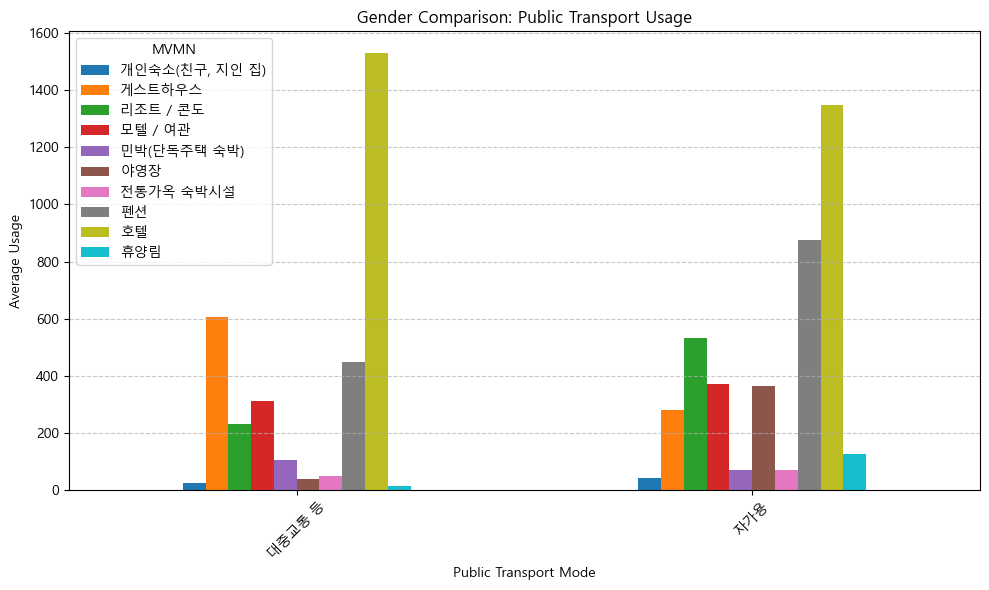

In [233]:
# 시각화: 성별 대중교통 이용 비교
group_lodging_crosstab.T.plot(kind='bar', figsize=(10, 6), title="Gender Comparison: Public Transport Usage")
plt.xlabel("Public Transport Mode")
plt.ylabel("Average Usage")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title="MVMN")
plt.tight_layout()
plt.show()

방문지 정보에서 숙소 빼내기

In [12]:
lodgings = m_df_dict['tn_visit_area_info_방문지정보']

In [13]:
lodgings[lodgings['VISIT_AREA_TYPE_CD'] == 24]

,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,...,POI_NM,RESIDENCE_TIME_MIN,VISIT_AREA_TYPE_CD,REVISIT_YN,VISIT_CHC_REASON_CD,LODGING_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,SGG_CD
21,2304290007,e_e000009,6,호텔 프라하,2023-04-29,2023-04-30,경기 평택시 통복로26번길 11,경기 평택시 통복동 114-10,127.083338,36.994097,...,호텔프라하,1290.0,24,N,8.0,2.0,1.0,1.0,1.0,NaN
61,2304280005,e_e000013,5,해브펀 캠핑 어라운드,2023-04-28,2023-04-29,경기 파주시 월롱면 도감로 130,경기 파주시 월롱면 위전리 89-1,126.799751,37.790896,...,해브펀캠핑어라운드,450.0,24,N,11.0,5.0,5.0,5.0,5.0,NaN
104,2304290005,e_e000020,5,파르티아 워터하우스,2023-04-29,2023-04-29,경기 가평군 설악면 미사리로 707-96,경기 가평군 설악면 미사리 500-1,127.540699,37.717804,...,파로티아워터하우스,0.0,24,N,8.0,1.0,4.0,3.0,4.0,NaN
106,2304290007,e_e000020,7,파르티아 워터하우스,2023-04-29,2023-04-30,경기 가평군 설악면 미사리로 707-96,경기 가평군 설악면 미사리 500-1,127.540699,37.717804,...,파로티아워터하우스,150.0,24,N,8.0,1.0,4.0,3.0,4.0,NaN
116,2304290004,e_e000021,6,호텔 헤르메스,2023-04-29,2023-04-29,경기 화성시 남양읍 역골로 9-28,경기 화성시 남양읍 남양리 2076,126.827220,37.200436,...,호텔헤르메스,120.0,24,N,7.0,1.0,4.0,4.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5453,2309170006,h_h006367,5,유지 공간,2023-09-17,2023-09-18,제주특별자치도 제주시 한림읍 금능남1길 22,제주특별자치도 제주시 한림읍 금능리 2088-8,126.231535,33.385660,...,유지공간,120.0,24,N,6.0,7.0,5.0,5.0,4.0,NaN
5502,2309190001,h_h006595,1,숙소,2023-09-19,2023-09-19,제주특별자치도 제주시 수덕1길 7,제주특별자치도 제주시 노형동 1288-4,NaN,NaN,...,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5503,2309190002,h_h006595,6,온예가,2023-09-19,2023-09-20,제주특별자치도 서귀포시 성산읍 온평애향로 68-6,제주특별자치도 서귀포시 성산읍 온평리 961-1,126.903461,33.405199,...,2001아울렛 구로점,450.0,24,N,2.0,8.0,5.0,4.0,4.0,NaN
5521,2309160002,h_h006639,6,제이 뷰 호텔,2023-09-16,2023-09-17,제주특별자치도 서귀포시 중산간서로 935,제주특별자치도 서귀포시 색달동 1622-2,126.416451,33.264705,...,제이뷰호텔,120.0,24,N,8.0,1.0,4.0,4.0,4.0,NaN


In [8]:
merged_traveler.to_csv("Mnmn_Traveler.csv", index=False)

In [11]:
merged_traveler[['TRAVEL_START_YMD', 'TRAVEL_END_YMD']] 

merged_traveler['TRAVEL_START_YMD'] = pd.to_datetime(merged_traveler['TRAVEL_START_YMD'])
merged_traveler['TRAVEL_END_YMD'] = pd.to_datetime(merged_traveler['TRAVEL_END_YMD'])

In [ ]:
merged_traveler['date_difference'] = (merged_traveler['TRAVEL_END_YMD'] - merged_traveler['TRAVEL_START_YMD']).dt.days

In [15]:
merged_traveler[['TRAVEL_START_YMD', 'TRAVEL_END_YMD']]

,TRAVEL_START_YMD,TRAVEL_END_YMD
0,2023-07-16,2023-07-17
1,2023-06-03,2023-06-04
2,2023-06-24,2023-06-25
3,2023-05-20,2023-05-22
4,2023-06-10,2023-06-11
...,...,...
11515,2023-06-06,2023-06-09
11516,2023-06-28,2023-06-29
11517,2023-05-17,2023-05-20
11518,2023-07-01,2023-07-03


In [19]:
merged_traveler[(merged_traveler['TRAVEL_END_YMD'] == merged_traveler['TRAVEL_START_YMD'])]

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,date_difference
7005,g002857,남,30,인천광역시,전남,나홀로 여행,g_g002857,27;28,2023-07-01,2023-07-01,대중교통 등,0


In [17]:
merged_traveler['date_difference'].value_counts()

date_difference
1    5264
2    3876
3    1517
4     640
5     159
6      35
7      20
8       8
0       1
Name: count, dtype: int64

In [ ]:
merged_traveler['TRAVEL_ID'] 

In [24]:
# 공통되지 않은 TRAVEL_ID 찾기
traveler_only_ids = merged_traveler[~merged_traveler['TRAVEL_ID'].isin(lodgings['TRAVEL_ID'])]
lodging_only_ids = lodgings[~lodgings['TRAVEL_ID'].isin(merged_traveler['TRAVEL_ID'])]

In [25]:
traveler_only_ids

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,date_difference
0,e004720,여,60,경기도,서울,2인 가족 여행,e_e004720,1;21;22;4;5,2023-07-16,2023-07-17,대중교통 등,1
1,e000914,여,20,대전광역시,서울,나홀로 여행,e_e000914,1;9,2023-06-03,2023-06-04,대중교통 등,1
2,e003564,여,30,경기도,경기,자녀 동반 여행,e_e003564,11;21;24;27;6,2023-06-24,2023-06-25,자가용,1
4,e001890,남,20,서울특별시,경기,2인 여행(가족 외),e_e001890,22;3;4;1;21,2023-06-10,2023-06-11,대중교통 등,1
5,e007797,남,30,경기도,경기,나홀로 여행,e_e007797,2;3;4;6;9,2023-08-31,2023-09-01,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11478,h006343,남,50,서울특별시,도서 지역,부모 동반 여행,h_h006343,21,2023-09-10,2023-09-11,자가용,1
11483,e003637,여,20,경기도,서울,3인 이상 여행(가족 외),e_e003637,1;2;22;26;7,2023-06-20,2023-06-21,대중교통 등,1
11484,h004396,여,20,경기도,도서 지역,나홀로 여행,h_h004396,2;24;4,2023-08-27,2023-08-28,NaN,1
11508,h003039,여,20,서울특별시,제주,나홀로 여행,h_h003039,1;21;27;4,2023-08-16,2023-08-17,대중교통 등,1


In [28]:
(traveler_only_ids['TRAVEL_END_YMD'] - traveler_only_ids['TRAVEL_START_YMD']).value_counts()

1 days    5199
2 days     485
3 days     169
4 days      57
5 days      14
6 days       5
7 days       1
0 days       1
8 days       1
Name: count, dtype: int64

In [ ]:
traveler_only_ids['TRAVELER_ID']

TRAVELER_ID
e004720    1
g002750    1
g012721    1
g000280    1
g012728    1
          ..
e007795    1
e002335    1
e000297    1
e003953    1
f003260    1
Name: count, Length: 5932, dtype: int64

In [54]:
merged_lodging = pd.merge(lodgings, travels, on='TRAVEL_ID', how='inner')  
merged_lodging = pd.merge(merged_lodging, travelers, on='TRAVELER_ID', how='inner')  

In [59]:
merged_lodging.to_csv('test.csv')

In [34]:
merged_lodging['TRAVELER_ID'].value_counts()

TRAVELER_ID
h000645    7
f000430    7
h000599    6
h001182    6
h002260    6
          ..
f013463    1
f013437    1
f013431    1
f013425    1
h006753    1
Name: count, Length: 5588, dtype: int64

In [19]:
travelers.head()

,TRAVELER_ID,RESIDENCE_SGG_CD,GENDER,AGE_GRP,EDU_NM,EDU_FNSH_SE,MARR_STTS,FAMILY_MEMB,JOB_NM,JOB_ETC,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
0,e004720,41,여,60,4,1.0,3,3,11,NaN,...,5,5,경기도,서울,2인 가족 여행,2023-07-16~2023-07-16,2,6.0,NaN,1
1,e000914,30,여,20,6,1.0,1,1,3,NaN,...,4,1,대전광역시,서울,나홀로 여행,2023-06-03~2023-06-03,1,7.0,10.0,0
2,e003564,41,여,30,7,1.0,2,4,2,NaN,...,1,7,경기도,경기,자녀 동반 여행,2023-06-24~2023-06-24,8,3.0,7.0,3
3,e000396,41,여,30,6,1.0,2,2,2,NaN,...,1,6,경기도,인천,2인 가족 여행,2023-05-20~2023-05-21,9,1.0,7.0,1
4,e001890,11,남,20,6,1.0,1,4,3,NaN,...,5,6,서울특별시,경기,2인 여행(가족 외),2023-06-04~2023-06-04,3,1.0,5.0,1


In [5]:
t_df = pd.read_csv('test.csv', index_col=0)

In [6]:
t_df.head()

,TRAVEL_ID,LODGING_NM,LODGING_PAYMENT_SEQ,LODGING_TYPE_CD,RSVT_YN,CHK_IN_DT_MIN,CHK_OUT_DT_MIN,PAYMENT_NUM,BRNO,STORE_NM,...,TRAVEL_END_YMD,MVMN_NM,TRAVEL_PERSONA,TRAVEL_MISSION,TRAVEL_MISSION_CHECK,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY
0,e_e000013,해브펀캠핑어라운드,0,5,Y,NaN,NaN,4,NaN,NaN,...,2023-04-30,NaN,서울 외 수도권 방문/수도권 외 거주/40세 이상/부모 동반/일반미션,1;22;24;6,1;8;6,여,20,전라북도,경기,부모 동반 여행
1,e_e000020,파로티아워터하우스,1,1,Y,NaN,NaN,1,NaN,아고다,...,2023-05-01,NaN,경기 방문/거주지 구분 없음/40세 이상/특별미션,28;21,21;2;5,여,40,서울특별시,경기,나홀로 여행
2,e_e000021,호텔헤르메스,1,1,N,NaN,NaN,2,NaN,화성 헤르메스 호텔,...,2023-05-01,NaN,경기 방문/거주지 구분 없음/40세 이상/특별미션,24,24;6;21,남,20,서울특별시,경기,2인 여행(가족 외)
3,e_e000038,호텔 더 메이,1,1,Y,NaN,NaN,2,NaN,주식회사 여기어때컴퍼니,...,2023-04-30,NaN,경기 방문/거주지 구분 없음/39세 이하/특별미션,21;22;23,21;23;10,남,30,서울특별시,경기,2인 가족 여행
4,e_e000294,봉화회관,0,2,Y,NaN,NaN,2,NaN,NaN,...,2023-05-22,자가용,서울 외 수도권 방문/수도권 외 거주/39세 이하/커플/일반미션,1;2;23;26,2;23;22,여,20,전라북도,경기,2인 여행(가족 외)


In [9]:
t_df.drop(['BRNO', 'PAYMENT_DT', 'PAYMENT_MTHD_SE', 'TRAVEL_NM', 'TRAVEL_PURPOSE', 'TRAVEL_START_YMD', 'TRAVEL_END_YMD'], axis=1, inplace=True)

In [12]:
movemnets = m_df_dict['tn_mvmn_consume_his_이동수단소비내역'][['TRAVEL_ID', 'MVMN_SE', 'MVMN_SE_NM', 'PAYMENT_SE']]

In [14]:
movemnets['TRAVEL_ID'].value_counts()

TRAVEL_ID
h_h004099    14
h_h000873    13
h_h000292    13
h_h001572    12
g_g007207    12
             ..
f_f015383     1
f_f015353     1
f_f015345     1
f_f015344     1
h_h006753     1
Name: count, Length: 10846, dtype: int64

In [31]:
frequent_travel_ids = t_df['TRAVEL_ID'].value_counts()
frequent_travel_ids = frequent_travel_ids[frequent_travel_ids > 1].index.tolist()

print(frequent_travel_ids.__len__())

1409


In [9]:
vistions = m_df_dict['tn_visit_area_info_방문지정보']

In [10]:
lodgings = m_df_dict['tn_lodge_consume_his_숙박소비내역']

In [12]:
shared_id_visition = vistions[vistions['TRAVEL_ID'].isin(lodgings['TRAVEL_ID'])]

In [21]:
filtered_id = shared_id_visition[shared_id_visition['VISIT_AREA_NM'].isin(lodgings['LODGING_NM'])]

In [25]:
filtered_id

,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,...,POI_NM,RESIDENCE_TIME_MIN,VISIT_AREA_TYPE_CD,REVISIT_YN,VISIT_CHC_REASON_CD,LODGING_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,SGG_CD
57,2304280001,e_e000013,1,집,2023-04-28,2023-04-28,서신동 노블레스아이원,NaN,NaN,NaN,...,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,4.511113e+09
64,2304290003,e_e000013,8,집,2023-04-29,2023-04-30,서신동 노블레스아이원,NaN,NaN,NaN,...,NaN,300.0,21,NaN,NaN,NaN,NaN,NaN,NaN,4.511113e+09
100,2304290001,e_e000020,1,집,2023-04-29,2023-04-29,NaN,NaN,NaN,NaN,...,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,1.141012e+09
112,2304300006,e_e000020,13,집,2023-04-30,2023-05-01,NaN,NaN,NaN,NaN,...,NaN,300.0,21,NaN,NaN,NaN,NaN,NaN,NaN,1.141012e+09
113,2304290001,e_e000021,1,집,2023-04-29,2023-04-29,극동강변아파트,NaN,NaN,NaN,...,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,1.159010e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,2309170004,h_h006639,10,서귀포자연휴양림,2023-09-17,2023-09-17,NaN,제주특별자치도 서귀포시 하원동 산 1-1,126.464557,33.312460,...,서귀포자연휴양림,60.0,1,N,1.0,NaN,4.0,4.0,4.0,NaN
5530,2309170005,h_h006639,11,집,2023-09-17,2023-09-18,박성내서길 8-6,NaN,NaN,NaN,...,NaN,420.0,21,NaN,NaN,NaN,NaN,NaN,NaN,5.011010e+09
5581,2309230001,h_h006753,1,집,2023-09-23,2023-09-23,독짓골2길 19,NaN,NaN,NaN,...,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,5.011010e+09
5582,2309230002,h_h006753,4,롯데호텔 제주,2023-09-23,2023-09-24,제주특별자치도 서귀포시 중문관광로72번길 35,제주특별자치도 서귀포시 색달동 2812-4,126.410600,33.248457,...,롯데호텔 제주,300.0,24,Y,5.0,1.0,5.0,5.0,5.0,NaN


In [24]:
filtered_id[filtered_id['VISIT_AREA_TYPE_CD'] == 24]

,VISIT_AREA_ID,TRAVEL_ID,VISIT_ORDER,VISIT_AREA_NM,VISIT_START_YMD,VISIT_END_YMD,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,...,POI_NM,RESIDENCE_TIME_MIN,VISIT_AREA_TYPE_CD,REVISIT_YN,VISIT_CHC_REASON_CD,LODGING_TYPE_CD,DGSTFN,REVISIT_INTENTION,RCMDTN_INTENTION,SGG_CD
158,2304280009,e_e000038,4,호텔 더 메이,2023-04-28,2023-04-29,경기 화성시 팔탄면 버들로1597번길 14-13,경기 화성시 팔탄면 월문리 235-36,126.876782,37.115914,...,호텔 더 메이,240.0,24,N,2.0,1.0,5.0,5.0,5.0,NaN
264,2305190003,e_e000301,3,콘래드 서울,2023-05-19,2023-05-20,서울 영등포구 국제금융로 10,서울 영등포구 여의도동 23-1,126.926743,37.525428,...,콘래드 서울,510.0,24,N,7.0,1.0,5.0,5.0,5.0,NaN
439,2305280003,e_e000336,7,켄싱턴호텔 여의도,2023-05-28,2023-05-29,서울 영등포구 국회대로76길 16,서울 영등포구 여의도동 13-3,NaN,NaN,...,켄싱턴호텔 여의도,510.0,24,N,7.0,1.0,5.0,5.0,5.0,NaN
472,2305190004,e_e000344,4,롯데호텔월드,2023-05-19,2023-05-19,서울 송파구 올림픽로 240,서울 송파구 잠실동 40-1,127.100341,37.511467,...,롯데호텔 월드점,720.0,24,N,7.0,1.0,4.0,4.0,4.0,NaN
473,2305190005,e_e000344,5,롯데호텔월드,2023-05-19,2023-05-20,서울 송파구 올림픽로 240,서울 송파구 잠실동 40-1,127.100341,37.511467,...,롯데호텔 월드점,120.0,24,N,7.0,1.0,4.0,4.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5302,2309040009,h_h005867,7,어라운드폴리,2023-09-04,2023-09-04,제주특별자치도 서귀포시 성산읍 서성일로 433,제주특별자치도 서귀포시 성산읍 난산리 2682,126.835927,33.415799,...,어라운드폴리,60.0,24,N,2.0,5.0,5.0,4.0,5.0,NaN
5378,2309160001,h_h006234,1,숙소,2023-09-16,2023-09-16,NaN,NaN,NaN,NaN,...,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,1.150011e+09
5502,2309190001,h_h006595,1,숙소,2023-09-19,2023-09-19,제주특별자치도 제주시 수덕1길 7,제주특별자치도 제주시 노형동 1288-4,NaN,NaN,...,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5503,2309190002,h_h006595,6,온예가,2023-09-19,2023-09-20,제주특별자치도 서귀포시 성산읍 온평애향로 68-6,제주특별자치도 서귀포시 성산읍 온평리 961-1,126.903461,33.405199,...,2001아울렛 구로점,450.0,24,N,2.0,8.0,5.0,4.0,4.0,NaN


In [40]:
m_df_dict['tn_mvmn_consume_his_이동수단소비내역']

,TRAVEL_ID,MVMN_SE,PAYMENT_SE,PAYMENT_SEQ,MVMN_SE_NM,RSVT_YN,PAYMENT_NUM,BRNO,STORE_NM,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC
0,e_e002471,1,주유비,0,자가용(승용/승합/트럭 등등),N,3,NaN,NaN,NaN,NaN,40000.0,NaN
1,e_e000006,1,주유비,0,자가용(승용/승합/트럭 등등),N,2,NaN,NaN,NaN,NaN,10000.0,NaN
2,e_e000006,5,교통비,0,지하철,N,2,NaN,NaN,NaN,NaN,3600.0,NaN
3,e_e000009,1,주유비,0,자가용(승용/승합/트럭 등등),N,2,NaN,NaN,NaN,NaN,30000.0,NaN
4,e_e000009,1,통행료,0,자가용(승용/승합/트럭 등등),N,2,NaN,NaN,NaN,NaN,3800.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,h_h006670,13,교통비,0,시내/마을버스,N,1,NaN,NaN,NaN,NaN,7500.0,NaN
1025,h_h006710,1,주유비,0,자가용(승용/승합/트럭 등등),N,1,NaN,NaN,NaN,NaN,30000.0,NaN
1026,h_h006710,1,주차비,0,자가용(승용/승합/트럭 등등),N,1,NaN,NaN,NaN,NaN,2500.0,NaN
1027,h_h006731,1,주유비,0,자가용(승용/승합/트럭 등등),N,2,NaN,NaN,NaN,NaN,20000.0,NaN


In [41]:
rsvt_t = m_df_dict['tn_mvmn_consume_his_이동수단소비내역'][~m_df_dict['tn_mvmn_consume_his_이동수단소비내역']['PAYMENT_DT'].isna()][['TRAVEL_ID', 'RSVT_YN', 'PAYMENT_DT', 'MVMN_SE_NM']]

In [ ]:
rsvt_l = m_df_dict['tn_lodge_consume_his_숙박소비내역'][~m_df_dict['tn_lodge_consume_his_숙박소비내역']['PAYMENT_DT'].isna()][['TRAVEL_ID', 'LODGING_NM', 'RSVT_YN', 'PAYMENT_DT', 'LODGING_TYPE_CD']]

In [46]:
rsvt = pd.merge(rsvt_t, rsvt_l, on='TRAVEL_ID', how='inner')

In [47]:
rsvt

,TRAVEL_ID,RSVT_YN_x,PAYMENT_DT_x,MVMN_SE_NM,LODGING_NM,RSVT_YN_y,PAYMENT_DT_y,LODGING_TYPE_CD
0,e_e000403,Y,2023-05-11 16:48,렌터카(승용/승합/버스 등등),쉐르빌온천관광호텔,Y,2023-05-18 00:00,1
1,e_e000403,Y,2023-05-08 13:16,KTX/SRT(고속열차),쉐르빌온천관광호텔,Y,2023-05-18 00:00,1
2,e_e000403,Y,2023-05-08 13:18,KTX/SRT(고속열차),쉐르빌온천관광호텔,Y,2023-05-18 00:00,1
3,e_e000453,Y,2023-05-30 16:28,관광버스,소테츠호텔즈 더스프라지르 서울명동,Y,2023-02-21 12:08,1
4,e_e000453,Y,2023-05-12 00:00,KTX/SRT(고속열차),소테츠호텔즈 더스프라지르 서울명동,Y,2023-02-21 12:08,1
...,...,...,...,...,...,...,...,...
4379,h_h005867,Y,2023-08-27 00:00,항공기,어라운드폴리,Y,2023-08-29 00:00,5
4380,h_h005867,Y,2023-08-28 00:00,항공기,어라운드폴리,Y,2023-08-29 00:00,5
4381,h_h006234,N,2023-09-16 10:10,렌터카(승용/승합/버스 등등),쥬디스펜션,Y,2023-07-07 00:00,3
4382,h_h006234,N,2023-09-16 07:30,항공기,쥬디스펜션,Y,2023-07-07 00:00,3


In [48]:
rsvt['PAYMENT_DT_x'] = pd.to_datetime(rsvt['PAYMENT_DT_x'])
rsvt['PAYMENT_DT_y'] = pd.to_datetime(rsvt['PAYMENT_DT_y'])

In [49]:
rsvt['delta_PAYMNET_DT'] = (rsvt['PAYMENT_DT_x'] - rsvt['PAYMENT_DT_y']).dt.days
rsvt

,TRAVEL_ID,RSVT_YN_x,PAYMENT_DT_x,MVMN_SE_NM,LODGING_NM,RSVT_YN_y,PAYMENT_DT_y,LODGING_TYPE_CD,delta_PAYMNET_DT
0,e_e000403,Y,2023-05-11 16:48:00,렌터카(승용/승합/버스 등등),쉐르빌온천관광호텔,Y,2023-05-18 00:00:00,1,-7
1,e_e000403,Y,2023-05-08 13:16:00,KTX/SRT(고속열차),쉐르빌온천관광호텔,Y,2023-05-18 00:00:00,1,-10
2,e_e000403,Y,2023-05-08 13:18:00,KTX/SRT(고속열차),쉐르빌온천관광호텔,Y,2023-05-18 00:00:00,1,-10
3,e_e000453,Y,2023-05-30 16:28:00,관광버스,소테츠호텔즈 더스프라지르 서울명동,Y,2023-02-21 12:08:00,1,98
4,e_e000453,Y,2023-05-12 00:00:00,KTX/SRT(고속열차),소테츠호텔즈 더스프라지르 서울명동,Y,2023-02-21 12:08:00,1,79
...,...,...,...,...,...,...,...,...,...
4379,h_h005867,Y,2023-08-27 00:00:00,항공기,어라운드폴리,Y,2023-08-29 00:00:00,5,-2
4380,h_h005867,Y,2023-08-28 00:00:00,항공기,어라운드폴리,Y,2023-08-29 00:00:00,5,-1
4381,h_h006234,N,2023-09-16 10:10:00,렌터카(승용/승합/버스 등등),쥬디스펜션,Y,2023-07-07 00:00:00,3,71
4382,h_h006234,N,2023-09-16 07:30:00,항공기,쥬디스펜션,Y,2023-07-07 00:00:00,3,71


In [89]:
rsvt['RSVT_LODGING'] = rsvt['delta_PAYMNET_DT'] > 0
rsvt['SAME_RSVT'] = rsvt['delta_PAYMNET_DT'] == 0
rsvt['RSVT_MVMN'] = rsvt['delta_PAYMNET_DT'] < 0

In [71]:
rsvt['TRAVEL_ID'].unique().__len__()

1037

In [63]:
rsvt['RSVT_YN_x'].value_counts()

RSVT_YN_x
N    2466
Y    1918
Name: count, dtype: int64

In [62]:
rsvt['RSVT_YN_y'].value_counts()

RSVT_YN_y
Y    4305
N      79
Name: count, dtype: int64

In [67]:
rsvt[rsvt['RSVT_YN_x']=='Y']['PAYMENT_DT_x'].mean()

Timestamp('2023-06-28 02:55:15.046924032')

In [68]:
rsvt[rsvt['RSVT_YN_y']=='Y']['PAYMENT_DT_y'].mean()

Timestamp('2023-07-03 16:12:09.923344896')

In [90]:
true_rsvt =  rsvt[rsvt['RSVT_YN_x'] == 'Y'][rsvt['RSVT_YN_y'] == 'Y']

C:\Users\PC\AppData\Local\Temp\ipykernel_72196\4212760877.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_rsvt =  rsvt[rsvt['RSVT_YN_x'] == 'Y'][rsvt['RSVT_YN_y'] == 'Y']


In [91]:
true_rsvt['TRAVEL_ID'].unique().__len__()

651

In [92]:
true_rsvt[rsvt['SAME_RSVT'] == True]['TRAVEL_ID'].unique().__len__()

C:\Users\PC\AppData\Local\Temp\ipykernel_72196\1192479573.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_rsvt[rsvt['SAME_RSVT'] == True]['TRAVEL_ID'].unique().__len__()


116

In [93]:
true_rsvt[rsvt['RSVT_LODGING'] == True]['TRAVEL_ID'].unique().__len__()

C:\Users\PC\AppData\Local\Temp\ipykernel_72196\2551144028.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_rsvt[rsvt['RSVT_LODGING'] == True]['TRAVEL_ID'].unique().__len__()


217

In [95]:
true_rsvt[rsvt['RSVT_MVMN'] == True]['MVMN_SE_NM'].value_counts()

C:\Users\PC\AppData\Local\Temp\ipykernel_72196\543489377.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_rsvt[rsvt['RSVT_MVMN'] == True]['MVMN_SE_NM'].value_counts()


MVMN_SE_NM
항공기                 773
렌터카(승용/승합/버스 등등)    287
KTX/SRT(고속열차)       214
배/선박                 33
새마을/무궁화열차            32
관광버스                  5
시외/고속버스               1
Name: count, dtype: int64

In [98]:
true_rsvt

,TRAVEL_ID,RSVT_YN_x,PAYMENT_DT_x,MVMN_SE_NM,LODGING_NM,RSVT_YN_y,PAYMENT_DT_y,LODGING_TYPE_CD,delta_PAYMNET_DT,RSVT_LODGING,SAME_RSVT,RSVT_MVMN
0,e_e000403,Y,2023-05-11 16:48:00,렌터카(승용/승합/버스 등등),쉐르빌온천관광호텔,Y,2023-05-18 00:00:00,1,-7,False,False,True
1,e_e000403,Y,2023-05-08 13:16:00,KTX/SRT(고속열차),쉐르빌온천관광호텔,Y,2023-05-18 00:00:00,1,-10,False,False,True
2,e_e000403,Y,2023-05-08 13:18:00,KTX/SRT(고속열차),쉐르빌온천관광호텔,Y,2023-05-18 00:00:00,1,-10,False,False,True
3,e_e000453,Y,2023-05-30 16:28:00,관광버스,소테츠호텔즈 더스프라지르 서울명동,Y,2023-02-21 12:08:00,1,98,True,False,False
4,e_e000453,Y,2023-05-12 00:00:00,KTX/SRT(고속열차),소테츠호텔즈 더스프라지르 서울명동,Y,2023-02-21 12:08:00,1,79,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4374,h_h005809,Y,2023-08-30 11:48:00,항공기,씨스테이호텔&스파,Y,2023-08-30 22:30:00,3,-1,False,False,True
4375,h_h005843,Y,2023-08-09 12:26:00,렌터카(승용/승합/버스 등등),로긴리조트&호텔,Y,2023-08-13 00:00:00,4,-4,False,False,True
4378,h_h005867,Y,2023-08-28 08:08:00,렌터카(승용/승합/버스 등등),어라운드폴리,Y,2023-08-29 00:00:00,5,-1,False,False,True
4379,h_h005867,Y,2023-08-27 00:00:00,항공기,어라운드폴리,Y,2023-08-29 00:00:00,5,-2,False,False,True


11520

In [ ]:
true_rsvt.count()

TRAVEL_ID           1894
RSVT_YN_x           1894
PAYMENT_DT_x        1894
MVMN_SE_NM          1894
LODGING_NM          1894
RSVT_YN_y           1894
PAYMENT_DT_y        1894
LODGING_TYPE_CD     1894
delta_PAYMNET_DT    1894
RSVT_LODGING        1894
SAME_RSVT           1894
RSVT_MVMN           1894
dtype: int64

In [123]:
merged_rsvt = pd.merge(true_rsvt , merged_traveler[['TRAVEL_ID', 'TRAVEL_STATUS_DESTINATION']], on='TRAVEL_ID', how='left')

In [124]:
merged_rsvt.count()

TRAVEL_ID                    1894
RSVT_YN_x                    1894
PAYMENT_DT_x                 1894
MVMN_SE_NM                   1894
LODGING_NM                   1894
RSVT_YN_y                    1894
PAYMENT_DT_y                 1894
LODGING_TYPE_CD              1894
delta_PAYMNET_DT             1894
RSVT_LODGING                 1894
SAME_RSVT                    1894
RSVT_MVMN                    1894
TRAVEL_STATUS_DESTINATION    1894
dtype: int64

In [148]:
copyed =  merged_rsvt.groupby('TRAVEL_ID').first().reset_index()

In [149]:
copyed

,TRAVEL_ID,RSVT_YN_x,PAYMENT_DT_x,MVMN_SE_NM,LODGING_NM,RSVT_YN_y,PAYMENT_DT_y,LODGING_TYPE_CD,delta_PAYMNET_DT,RSVT_LODGING,SAME_RSVT,RSVT_MVMN,TRAVEL_STATUS_DESTINATION
0,e_e000308,Y,2023-05-24 00:00:00,KTX/SRT(고속열차),밀리오레호텔 명동,Y,2023-05-26 00:31:00,1,-3,False,False,True,서울
1,e_e000403,Y,2023-05-11 16:48:00,렌터카(승용/승합/버스 등등),쉐르빌온천관광호텔,Y,2023-05-18 00:00:00,1,-7,False,False,True,경기
2,e_e000453,Y,2023-05-30 16:28:00,관광버스,소테츠호텔즈 더스프라지르 서울명동,Y,2023-02-21 12:08:00,1,98,True,False,False,서울
3,e_e000474,Y,2023-05-03 16:34:00,KTX/SRT(고속열차),아셈호텔,Y,2023-05-22 10:32:00,1,-19,False,False,True,인천
4,e_e000509,Y,2023-05-17 17:08:00,KTX/SRT(고속열차),토요코인호텔 영등포점,Y,2023-05-15 00:00:00,1,2,True,False,False,서울
...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,h_h006150,Y,2023-09-05 18:06:00,항공기,우도머뭄,Y,2023-09-01 15:18:00,7,4,True,False,False,제주
647,h_h006175,Y,2023-09-05 15:50:00,렌터카(승용/승합/버스 등등),마요피갤러리,Y,2023-09-01 12:37:00,7,4,True,False,False,제주
648,h_h006192,Y,2023-09-04 00:00:00,항공기,제주스테이호텔,Y,2023-09-04 00:00:00,1,0,False,True,False,제주
649,h_h006215,Y,2023-09-02 15:53:00,항공기,블루하와이리조트,Y,2023-09-12 06:25:00,4,-10,False,False,True,제주


In [165]:
copyed['RSVT_LODGING'].value_counts()

RSVT_LODGING
False    474
True     177
Name: count, dtype: int64

In [166]:
copyed['SAME_RSVT'].value_counts()

SAME_RSVT
False    577
True      74
Name: count, dtype: int64

In [167]:
copyed['RSVT_MVMN'].value_counts()

RSVT_MVMN
True     400
False    251
Name: count, dtype: int64

In [170]:
copyed.groupby(['RSVT_LODGING', 'SAME_RSVT', 'RSVT_MVMN']).count()

TRAVEL_ID  RSVT_YN_x  PAYMENT_DT_x  \
RSVT_LODGING SAME_RSVT RSVT_MVMN                                       
False        False     True             400        400           400   
             True      False             74         74            74   
True         False     False            177        177           177   

                                  MVMN_SE_NM  LODGING_NM  RSVT_YN_y  \
RSVT_LODGING SAME_RSVT RSVT_MVMN                                      
False        False     True              400         400        400   
             True      False              74          74         74   
True         False     False             177         177        177   

                                  PAYMENT_DT_y  LODGING_TYPE_CD  \
RSVT_LODGING SAME_RSVT RSVT_MVMN                                  
False        False     True                400              400   
             True      False                74               74   
True         False     False               177              177   

                                  delta_PAYMNET_DT  TRAVEL_STATUS_DESTINATION  
RSVT_LODGING SAME_RSVT RSVT_MVMN                                               
False        False     True                    400                        400  
             True      False                    74                         74  
True         False     False                   177                        177

In [160]:
copyed.groupby('TRAVEL_STATUS_DESTINATION').count()[['TRAVEL_ID']]

,TRAVEL_ID
TRAVEL_STATUS_DESTINATION,
강원,38
경기,9
경남,8
경북,24
광주,5
대구,7
대전,23
도서 지역,12
부산,46


<Axes: title={'center': 'Gender Comparison: Public Transport Usage'}, xlabel='TRAVEL_STATUS_DESTINATION'>

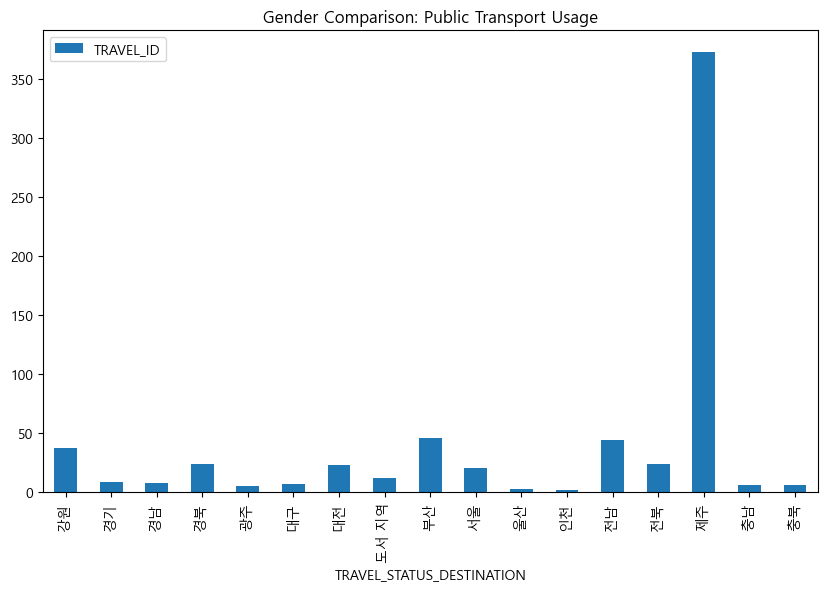

In [161]:
copyed.groupby('TRAVEL_STATUS_DESTINATION').count()[['TRAVEL_ID']].plot(kind='bar', figsize=(10, 6), title="Gender Comparison: Public Transport Usage")

In [177]:
merged_traveler

,TRAVELER_ID,GENDER,AGE_GRP,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM
0,e004720,여,60,경기도,서울,2인 가족 여행,e_e004720,1;21;22;4;5,2023-07-16,2023-07-17,대중교통 등
1,e000914,여,20,대전광역시,서울,나홀로 여행,e_e000914,1;9,2023-06-03,2023-06-04,대중교통 등
2,e003564,여,30,경기도,경기,자녀 동반 여행,e_e003564,11;21;24;27;6,2023-06-24,2023-06-25,자가용
3,e000396,여,30,경기도,인천,2인 가족 여행,e_e000396,23,2023-05-20,2023-05-22,자가용
4,e001890,남,20,서울특별시,경기,2인 여행(가족 외),e_e001890,22;3;4;1;21,2023-06-10,2023-06-11,대중교통 등
...,...,...,...,...,...,...,...,...,...,...,...
11515,h000499,여,30,서울특별시,제주,부모 동반 여행,h_h000499,12;2;21;22;5,2023-06-06,2023-06-09,자가용
11516,f003260,남,30,부산광역시,경남,2인 여행(가족 외),f_f003260,1;2;4,2023-06-28,2023-06-29,자가용
11517,h000072,남,50,경기도,제주,나홀로 여행,h_h000072,21;24;27;28,2023-05-17,2023-05-20,대중교통 등
11518,h001144,남,20,강원도,제주,나홀로 여행,h_h001144,21;23;24;26;4,2023-07-01,2023-07-03,자가용


In [178]:
rsvt_l = m_df_dict['tn_lodge_consume_his_숙박소비내역'][~m_df_dict['tn_lodge_consume_his_숙박소비내역']['RSVT_YN'].isna()][['TRAVEL_ID', 'LODGING_NM', 'RSVT_YN', 'LODGING_TYPE_CD']]
rsvt_t = m_df_dict['tn_mvmn_consume_his_이동수단소비내역'][~m_df_dict['tn_mvmn_consume_his_이동수단소비내역']['RSVT_YN'].isna()][['TRAVEL_ID', 'RSVT_YN', 'MVMN_SE_NM']]

In [179]:
rsvt = pd.merge(rsvt_t, rsvt_l, on='TRAVEL_ID', how='inner')

In [181]:
rsvt['TRAVEL_ID'].unique().__len__()

5462

In [5]:
owners = merged_traveler[merged_traveler['MVMN_NM'] == '자가용']

KeyError: "'orange' is not a known colormap name"

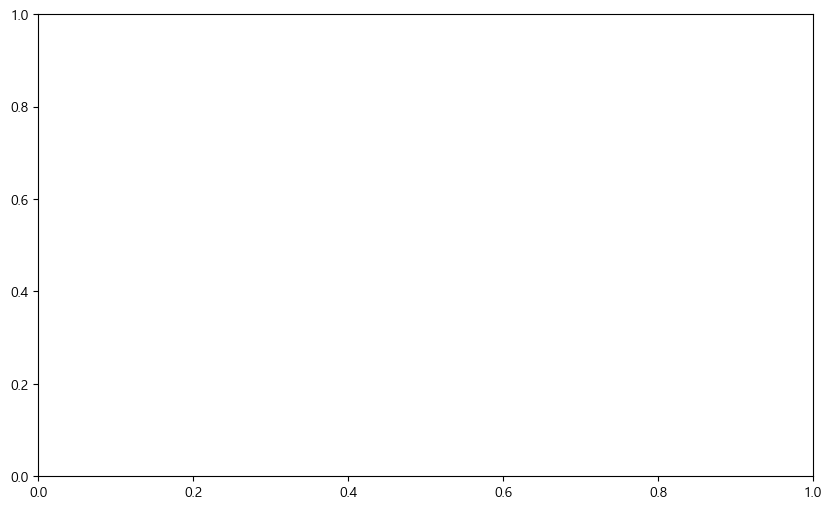

In [ ]:
owners.groupby('TRAVEL_STATUS_ACCOMPANY').count()['TRAVEL_ID'].plot(kind='bar', figsize=(10, 6), title="Gender Comparison: Public Transport Usage")